In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn import cluster

file =r"C:\Users\amitn\Desktop\ms data science\Data mining\seeds_dataset.txt"
df_all = pd.read_csv(file, delim_whitespace = True, header=None, names =["Area","Perimeter","compactness","Len_kernel","width_Kernel","asymetry_coef","Len_groove","class"])
df=pd.DataFrame({"Area":df_all.values[:,0],"Perimeter": df_all.values[:,1],"compactness":df_all.values[:,2],"Len_kernel": df_all.values[:,3],"width_Kernel" :df_all.values[:,4],"asymetry_coef" :df_all.values[:,5],"Len_groove":df_all.values[:,6]})
True_class= np.zeros(210)
True_class= df_all.values[:,7]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, True_class,test_size=0.4, random_state=3)
#for i in range(4):
 #       X_train.values[:,i]=(X_train.values[:,i]-X_train.values[:,i].mean())/X_train.values[:,i].std()
  #      X_test.values[:,i]= (X_test.values[:,i]-X_train.values[:,i].mean())/X_train.values[:,i].std()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on test set: 0.92


In [31]:
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))

[[ 0 27  0]
 [ 0 34  0]
 [ 0 23  0]]


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn import cluster

file =r"C:\Users\amitn\Desktop\ms data science\Data mining\seeds_dataset.txt"
df_all = pd.read_csv(file, delim_whitespace = True, header=None, names =["Area","Perimeter","compactness","Len_kernel","width_Kernel","asymetry_coef","Len_groove","class"])
#df=pd.DataFrame({"Area":df_all.values[:,0],"Perimeter": df_all.values[:,1],"compactness":df_all.values[:,2],"Len_kernel": df_all.values[:,3],"width_Kernel" :df_all.values[:,4],"asymetry_coef" :df_all.values[:,5],"Len_groove":df_all.values[:,6]})
#True_class= np.zeros(210)
#True_class= df_all.values[:,7]
df=pd.DataFrame({"Area":df_all.values[:,0],"compactness":df_all.values[:,2],"asymetry_coef" :df_all.values[:,5],"Len_groove":df_all.values[:,6]})
True_class= np.zeros(210)
True_class= df_all.values[:,7]
#for i in range(4):
 #       df.values[:,i]=(df.values[:,i]-df.values[:,i].mean())/df.values[:,i].std()
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, shuffle=True)
#result = next(kf.split(df), None)
#print (result)
labels_train=np.zeros((168,10))
labels_test=np.zeros((42,10))
j=1
k=0
#train = df.iloc[result[0]]
#test =  df.iloc[result[1]]
y_train=np.zeros(168)
y_test=np.zeros(42)
for train_index, test_index in kf.split(df):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.values[train_index], df.values[test_index]
    y_train, y_test = True_class[train_index], True_class[test_index]
    for i in range(4):
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    #    X_train[:,i]=(X_train[:,i]-X_train[:,i].mean())/X_train[:,i].std()
     #   X_test[:,i]= (X_test[:,i]-X_train[:,i].mean())/X_train[:,i].std()
    #kmeans=KMeans(n_clusters=3).fit(X_train[:,:7])
    #x = sns.boxplot(data=X_train, orient="h", palette="Set2")
    #centers=np.asarray(kmeans.cluster_centers_,dtype=np.uint8)
    #labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
    #labels_train[:,k]=labels
    #labels_train[:,k+1]=y_train
    
    #LABEL_COLOR_MAP = {0 : 'r',1 : 'k', 2 : 'b'}
    #label_color = [LABEL_COLOR_MAP[l] for l in labels]
#b=plt.scatter(df.values[:,0], df.values[:,1], c=label_color)
    print("cross validation set")
    print(j)
    j=j+1
    print('\n')
    from sklearn.linear_model import LogisticRegression
   # logreg = LogisticRegression()
    clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
    #lda.fit(X_train, y_train)
    print('Accuracy of LDA classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of LDA classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))
    #pred = lda.predict(X_test)
    #print(confusion_matrix(y_test, pred))

cross validation set
1


Accuracy of LDA classifier on training set: 0.93
Accuracy of LDA classifier on test set: 0.88
cross validation set
2


Accuracy of LDA classifier on training set: 0.91
Accuracy of LDA classifier on test set: 0.95
cross validation set
3


Accuracy of LDA classifier on training set: 0.93
Accuracy of LDA classifier on test set: 0.86
cross validation set
4


Accuracy of LDA classifier on training set: 0.92
Accuracy of LDA classifier on test set: 0.93
cross validation set
5


Accuracy of LDA classifier on training set: 0.94
Accuracy of LDA classifier on test set: 0.83


[ 0.71874303  0.17108184]


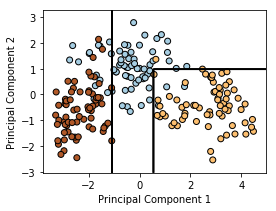

In [38]:
#X= df_all.values[:, 4:6]  # we only take the first two features.
Y = df_all.values[:, 7]

h = .02  # step size in the mesh
for i in range(7):
        df.values[:,i]=(df.values[:,i]-df.values[:,i].mean())/df.values[:,i].std()


from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(df)
X = pca.transform(df)
print(pca.explained_variance_ratio_) 

# we create an instance of Neighbours Classifier and fit the data.
#logreg.fit(X, Y)
clf=DecisionTreeClassifier(max_depth=2).fit(X,Y)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.contour(xx, yy, Z, colors= 'black')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())
#plot_boundary(X_train, lambda x: predict(x, theta))
plt.show()

[ 0.71874303  0.17108184]


C:\Users\amitn\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


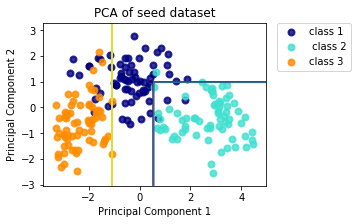

In [39]:
#X= df_all.values[:, 4:6]  # we only take the first two features.
Y = df_all.values[:, 7]
for i in range(210):
    Y[i]=int(Y[i])
h = .02  # step size in the mesh
for i in range(7):
        df.values[:,i]=(df.values[:,i]-df.values[:,i].mean())/df.values[:,i].std()
target_names=["class 1"," class 2","class 3"]

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(df)
X = pca.transform(df)
print(pca.explained_variance_ratio_) 
#qda.fit(X,Y)
clf=DecisionTreeClassifier(max_depth=2).fit(X,Y)
# we create an instance of Neighbours Classifier and fit the data.
#logreg.fit(X, Y)
colors = ['navy', 'turquoise', 'darkorange']
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.contour(xx, yy, Z, color = 'black')
for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], color=color, alpha=.8, lw= 2,
                label=target_name)
#plt.legend(loc=4,shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('PCA of seed dataset')
# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, label = ["class 1"," class 2","class 3"])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.legend()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())
#plot_boundary(X_train, lambda x: predict(x, theta))
plt.show()


